# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Open the data file and study the general information. 

In [1]:
#import libraries
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import warnings

#ignorning warning
warnings.simplefilter ('ignore')

#make a try-except block in order to avoid file path error
try:
    df = pd.read_csv('vehicles_us.csv')
except:
    df = pd.read_csv('/datasets/vehicles_us.csv')

check the table's first 10 rows to see the general information.     


In [2]:
df.head(10)

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     honda pilot  excellent        NaN  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  
5    automatic   sedan       black     1.0  2018-06-20           15  
6    automatic   sedan       white     NaN  2018-12-27           73  
7    automatic     SUV       black     1.0  2019-01-07           68  
8    automatic     SUV         NaN     1.0  2018-07-16           19  
9    automatic     SUV        blue     1.0  2019-02-15           17

Check the table's general structure.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Check the table's numeric columns general statistics.

In [4]:
df.describe()

price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000

Check the table's object columns general statistics.

In [5]:
df.describe(include='object')

model  condition   fuel transmission   type paint_color  \
count        51525      51525  51525        51525  51525       42258   
unique         100          6      5            3     13          12   
top     ford f-150  excellent    gas    automatic    SUV       white   
freq          2796      24773  47288        46902  12405       10029   

       date_posted  
count        51525  
unique         354  
top     2019-03-17  
freq           186

Show the columns with missing values 

In [6]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

show how much missing values comapred to total values in columns

In [7]:
df.isna().mean()

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

Number of duplicated rows

In [8]:
df.duplicated().sum()

0

Checking initial correlation between columns.

In [9]:
df.corr()

price  model_year  cylinders  odometer  is_4wd  days_listed
price        1.000000    0.428656   0.296627 -0.420299     NaN    -0.000682
model_year   0.428656    1.000000  -0.148040 -0.473948     NaN    -0.005703
cylinders    0.296627   -0.148040   1.000000  0.090160     NaN     0.005517
odometer    -0.420299   -0.473948   0.090160  1.000000     NaN     0.003804
is_4wd            NaN         NaN        NaN       NaN     NaN          NaN
days_listed -0.000682   -0.005703   0.005517  0.003804     NaN     1.000000

### Conclusion
#### After having a look at the table's general information, We discovered useful information regarding our data.
#### there are no duplicates in our data

##### There are 5 columns that contain missing values across the data.
We identifed that 5 columns have missing values: model_year(7.0% missing values), cylinders(10.2% missing values),  odometer(15.3% missing values), paint_color(17.9% missing values) and is_4wd(50.3% missing values).

The model_year column is missing 7% of its values, and by looking at its correlation to the price - we can tell the price increases with the model year and will fill the missing values by the most common value for other models, categorized by their odometer.


***the cylinders column is missing 10% of its values, we do see correlation between the cylinders and the price, we will use model and model_year columns in order to fill this column

***the odometer column is missing 15% of its values, we will use model and model_year columns in order to fill this column.

paint_color is missing 17.9% of its values, and we will check its importance, even thought it probably doesnt impact much

is_4wd is missing 50.3% of its values, more than half of the data. after checking the column, it's values are either 1.0 or NaN, meaning the NaN is reffering to 0 and that will be the filled value - a boolean. I would confirm this with the data providers.


#### There are 5 columns that their datatypes should be changed
columns model_year, cylinders and odometer should be changed to int, is_4wd to bool, date_posted to datettime.


#### there are illogical values in price column (value of 1).
those values might have been placed with intention to appear first when searching by price,
but those values affect the real price of the cars in our analysis and will be removed.
We could treat them as an outlier, but I prefer removing due to their illogical value and effect on the price.

#### initial correlation analysis
by looking at the correlation matrix, we can tell that the price has a positive correlation with the model's year, and with 
cylinders - the higher they are - they higher the price goes.
we can also tell the price is negatively correlated with the odometer which makes sense - the higher the odometer, the lower the price.
odometer is negatively correlated with the model's year - the higher it is - the lower the model's year is

## Data preprocessing

### filling missing model_year values

categorizing by price by quartiles and mean price

In [10]:
df['price_category'] = pd.cut(df['price'], bins=[1, 5000, 12131 , 16839, 375000], include_lowest=True,
       labels=['low', 'below_average', 'above_average','high'])

storing the mode of model_year per model by price category in a variable 

In [11]:
common_year = df.groupby(['price_category','model'])['model_year'].transform(lambda x: x.value_counts().idxmax())

In [12]:
common_year.head()

0    2010.0
1    2014.0
2    2011.0
3    2003.0
4    2015.0
Name: model_year, dtype: float64

replacing missing values with the common_year

In [13]:
df['model_year'] = df['model_year'].fillna(common_year)

verifying model_year NaN is replaced with common_year

In [14]:
df['model_year'].isna().sum()

0

### filling missing cylinders and  odometers values

In [15]:
#categorizing by quartiles of model_years for common cylinders in those years
df['model_years_cat'] = pd.cut(df['model_year'], bins=[1908, 2006, 2011 , 2014, 2019], include_lowest=True,
       labels=['old', 'semi old', 'semi new','new'])

#storing the method 
common_cyl = df.groupby(['model','model_years_cat'])['cylinders'].transform(lambda x: x.value_counts().idxmax())

using common_cyl to fill the missing cylinders

In [16]:
df['cylinders'] = df['cylinders'].fillna(common_cyl)

verifying cylinders NaN is replaced with common_year

In [17]:
df['cylinders'].isna().sum()

0

checking the statistics and correlation didnt have a noticeable change to make sure our approach is correct

In [18]:
df.describe()
df.corr()

price  model_year  cylinders  odometer  is_4wd  days_listed
price        1.000000    0.434036   0.295915 -0.420299     NaN    -0.000682
model_year   0.434036    1.000000  -0.148937 -0.474656     NaN    -0.004774
cylinders    0.295915   -0.148937   1.000000  0.093070     NaN     0.003600
odometer    -0.420299   -0.474656   0.093070  1.000000     NaN     0.003804
is_4wd            NaN         NaN        NaN       NaN     NaN          NaN
days_listed -0.000682   -0.004774   0.003600  0.003804     NaN     1.000000

will use mean odometer by model and model year category to fill 

In [19]:
common_meter = df.groupby(['model','model_years_cat'])['odometer'].transform(lambda x: np.mean(x))

df['odometer'] = df['odometer'].fillna(common_meter)

checking and viewing rows with missing values

In [20]:
df['odometer'].isna().sum()

df[df['odometer'].isna()]

price  model_year                              model  condition  \
42     34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
1642   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
2232   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
2731   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
4149   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
4681   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
5681   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
8975   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
10600  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
11541  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
11916  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
14796  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
14871  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
17473  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
17493  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
18103  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
18811  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
19877  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
22002  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
23445  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
25982  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
26905  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
27345  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
31895  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
34466  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
34621  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
34905  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
36088  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
36518  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
38204  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
39904  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
40524  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
42116  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
42393  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
42503  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
44327  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
44698  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
48012  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
48483  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
50547  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
50624  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   

       cylinders    fuel  odometer transmission type paint_color  is_4wd  \
42           6.0  diesel       NaN    automatic  van       black     NaN   
1642         6.0  diesel       NaN    automatic  van       black     NaN   
2232         6.0  diesel       NaN    automatic  van       black     NaN   
2731         6.0  diesel       NaN    automatic  van       black     NaN   
4149         6.0  diesel       NaN    automatic  van       black     NaN   
4681         6.0  diesel       NaN    automatic  van         NaN     NaN   
5681         6.0  diesel       NaN    automatic  van       black     NaN   
8975         6.0  diesel       NaN    automatic  van         NaN     NaN   
10600        6.0  diesel       NaN    automatic  van       black     NaN   
11541        6.0  diesel       NaN    automatic  van         NaN     NaN   
11916        6.0  diesel       NaN    automatic  van       bla

we can tell the remaining 41 missing values are different ads posted for the same model. we will fill it using the average 
in the same model_year - 2013 and same condition - excelllent.

In [21]:
filler = df.loc[(df['model_year']==2013) & (df['condition']== 'excellent'),['odometer']]
filler_mean = int(filler.mean())
df['odometer'] = df['odometer'].fillna(filler_mean)


### filling paint_color

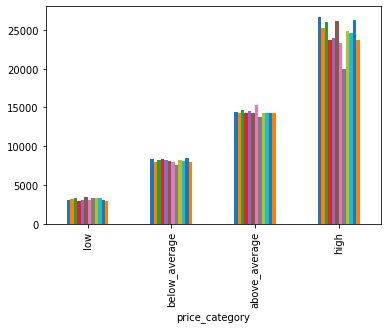

In [22]:
#checking for relation between colors and price
color= df.pivot_table(index='price_category',columns='paint_color',values='price')
color.plot(kind='bar',legend=False);

by looking at the graph we can see there are no significant differences between colors and their price,adding to the fact
that we cant assume the paint_color by any of the existing columns, - we will fill it with not_listed. 


In [23]:
df['paint_color'] = df['paint_color'].fillna('not_listed')
df['paint_color'].isna().sum()

0

### filling is_4wd

will fill missing with 0, as 1 refers to true ( is 4wd) and missing refers to false ( is not 4wd)

In [24]:
df['is_4wd'] = df['is_4wd'].fillna(0)

checking to confirm no missing values left

In [25]:
df.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
price_category     0
model_years_cat    0
dtype: int64

### removing rows with price of 1

price 1 values might have been placed with intention to appear first when searching by price, but those values affect the real price of the cars in our analysis and will be removed. We could treat them as an outlier, but I prefer removing due to their illogical value and effect on the price.

checking num of rows with price 1

In [26]:
df.query('price == 1').count()

price              798
model_year         798
model              798
condition          798
cylinders          798
fuel               798
odometer           798
transmission       798
type               798
paint_color        798
is_4wd             798
date_posted        798
days_listed        798
price_category     798
model_years_cat    798
dtype: int64

removing the rows (1.5% of the data)

In [27]:
df = df.drop(df[df['price'] == 1].index)

### changing datatypes

changing model_year, cylinders and odometer from float to int


In [28]:
df = df.astype ({"model_year":"int64", "cylinders":"int64", "odometer":"int64"})

changing is_4wd to bool 

In [29]:
df["is_4wd"] = df["is_4wd"].astype(bool)

changing date_posted to datetime

In [30]:
df['date_posted'] =  pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

checking all dtypes changes


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50727 entries, 0 to 51524
Data columns (total 15 columns):
price              50727 non-null int64
model_year         50727 non-null int64
model              50727 non-null object
condition          50727 non-null object
cylinders          50727 non-null int64
fuel               50727 non-null object
odometer           50727 non-null int64
transmission       50727 non-null object
type               50727 non-null object
paint_color        50727 non-null object
is_4wd             50727 non-null bool
date_posted        50727 non-null datetime64[ns]
days_listed        50727 non-null int64
price_category     50727 non-null category
model_years_cat    50727 non-null category
dtypes: bool(1), category(2), datetime64[ns](1), int64(5), object(6)
memory usage: 5.2+ MB


### Conclusion:
The missing values of model_year , cylinders , odometer, paint_color and is_4wd columns have been filled successfully,
leaving us with no missing values to deal with.
We have created a new column named price_category which categorizes the price.
The rows with price value of 1 have been removed, and the dtypes have been changed to their logical type.

## Make calculations and add them to the table

creating 3 seperate columns for day, month, year of the ad.

In [32]:
df['ad_week_day'] = df['date_posted'].dt.day_name()
df['ad_month'] = df['date_posted'].dt.month_name()
df['ad_year'] = df['date_posted'].dt.year

adding vehicle's age in years column

In [33]:
df['vehicle_age'] = (df['date_posted'].dt.year - df['model_year'])

adding average mileage per year column

handling non 0 values first

In [34]:
df['avg_mileage'] = (df.query('odometer > 0 and vehicle_age > 0')['odometer']) / (df.query('odometer > 0 and vehicle_age > 0')['vehicle_age'])

handling 0 odometer 

In [35]:
df.loc[(df['odometer']==0),['avg_mileage']] = 0

handling 0 age

In [36]:
store = df.query('vehicle_age == 0')['odometer']
df.loc[(df['vehicle_age']==0),['avg_mileage']] = store

float to int

In [37]:
df["avg_mileage"] = df["avg_mileage"].astype(int)

replace string values with numeric valus in the condition column
5 - new , 4 - like new , 3 - excellent, 2 - good , 1 - fair , 0 - salvage

In [38]:
df['condition'] = df['condition'].replace(['salvage','fair','good','excellent','like new','new'],[0,1,2,3,4,5])

### Conclusion:
several columns were added to our dataset : 
ad_week_day - day of the week the ad was placed, 
ad_month - the month the ad was placed, 
ad_year - the year the ad was placed, 
vehicle_age - the vehicle's age, 
avg_mileage - how much average mileage per year

We also replaced string values with numeric values in the condition column:
5 - new , 4 - like new , 3 - excellent, 2 - good , 1 - fair , 0 - salvage

## Carry out exploratory data analysis

### study price, vehicle_age ,mileage, cylinders and condition parameters by plotting histograms and understanding outliers. 

In [39]:
#creating general function to calcuate highest and lowest values inside the lower and upper fences.
def iqr_fence(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    u = max(df[column][df[column]<Upper_Fence])
    l = min(df[column][df[column]>Lower_Fence])
    return [l,u]

calculating price limits and plotting price initial histogram

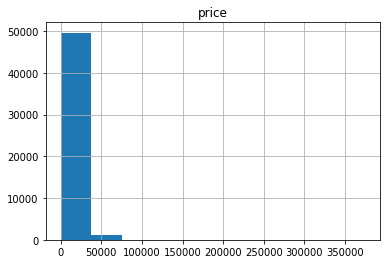

In [40]:
price_limits = iqr_fence(df,'price')
df.hist('price');

we can see that the price has a very wide range of values with a little spread of values - big upper outlier.
adding range in order to get a better look on the values to determine the size of the outlier.

[3, 34275]

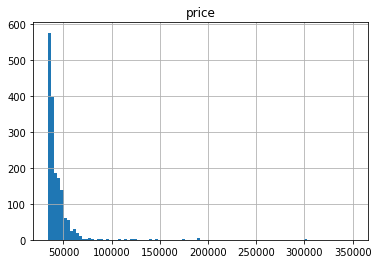

In [41]:
df.hist('price',bins=100,range=(34276,350000));
price_limits

#### Conclusion:
every price above 34275, our highest value inside the upper fence - will be considered an upper outlier.

calculating age limits and plotting age initial histogram

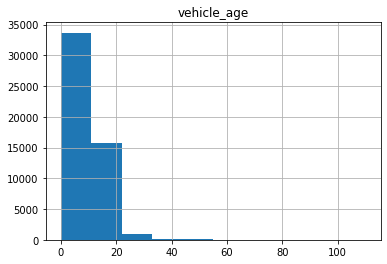

In [42]:
age_limits = iqr_fence(df,'vehicle_age')
df.hist('vehicle_age');

we can see that the age has a very wide range of values with a little spread of values - big outlier.
adding range in order to get a better look on the values to determine the size of the outlier.

[0, 23]

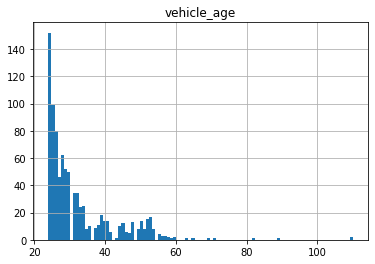

In [43]:
df.hist('vehicle_age',bins=100,range=(24,110));
age_limits

#### Conclusion:
every age above 23, our highest value inside the upper fence - will be considered an outlier.

calculating mileage limits and plotting mileage initial histogram

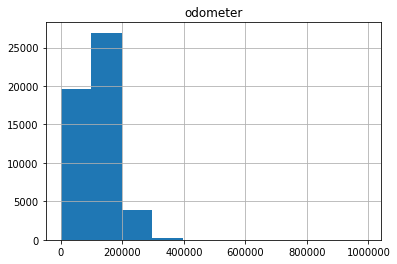

In [44]:
mileage_limits = iqr_fence(df,'odometer')
df.hist('odometer');

we can see that the mileage has a very wide range of values with a little spread of values - big outlier.
adding range in order to get a better look on the values to determine the size of the outlier.

[0, 274700]

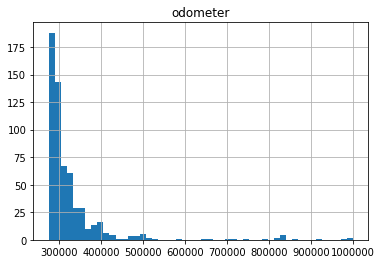

In [45]:
df.hist('odometer',bins=50,range=(274701,1000000));
mileage_limits

#### Conclusion:
mileage above 274700, our highest value inside the upper fence - will be considered an outlier.

calculating cylinders limits, plotting cylinders initial histogram and checking for the outliers.

[3, 12]

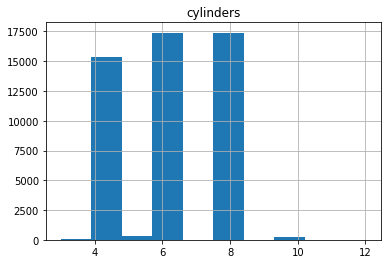

In [46]:
cylinders_limits = iqr_fence(df,'cylinders')
df.hist('cylinders');
cylinders_limits

[3, 12]

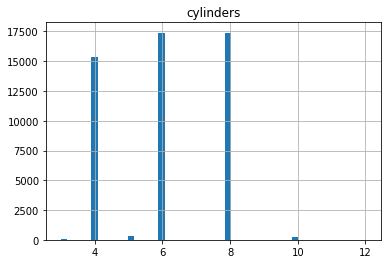

In [47]:
df.hist('cylinders',bins=50);
cylinders_limits

#### Conclusion:
There are no outliers in the cylinders parameter, as all the values remain inside the fences.

calculating condition limits and plotting condition initial histogram

[1, 4]

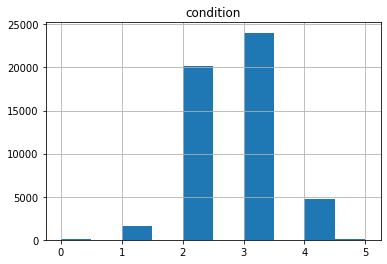

In [48]:
condition_limits = iqr_fence(df,'condition')
df.hist('condition');
condition_limits

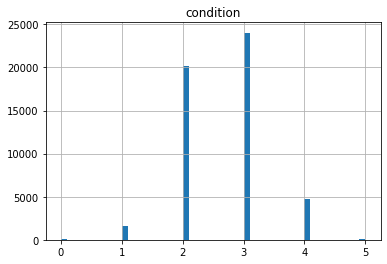

In [49]:
df.hist('condition',bins=50);

#### Conclusion:
Since condition is categorical, the so called outliers here (0,5) won't be removed, 
since they don't represent numeric value, they represent categories that we need to consider.

### determine upper limits of outliers, remove outliers and store in different df

In [50]:
# using the function iqr_fence with a small change to return the fences, we will get the limits of the outliers.
def iqr_fence2(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    u = max(df[column][df[column]<Upper_Fence])
    l = min(df[column][df[column]>Lower_Fence])
    return [Lower_Fence,Upper_Fence]

parameters limits, no cylinders as we saw there are no outliers, and no condition as its categorical.


In [51]:
print('Price fences: {}'.format(iqr_fence2(df,'price')))
print('age fences: {}'.format(iqr_fence2(df,'vehicle_age')))
print('mileage fences: {}'.format(iqr_fence2(df,'odometer')))

Price fences: [-12113.0, 34319.0]
age fences: [-8.0, 24.0]
mileage fences: [-47453.25, 274856.75]


filter price by fences, since we dont have values close to or below the lower fences, it isnt neccesary here.
storing price's outliers in a new df called outliers_df.

In [52]:
outliers_df = df.query('price > 34319 or vehicle_age > 24 or odometer > 274856')

removing the outliers from our data and making a filtered df

In [53]:
index_names = df[(df['price'] > 34319) | (df['vehicle_age'] > 24) | (df['odometer'] > 274856)].index
df_filtered = df.drop(index_names)

### new filtered data histograms & comparisons between old & new

price filtered histogram and price unfiltered histogram for comparison

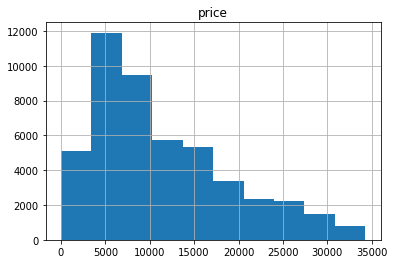

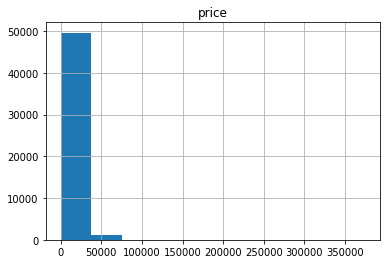

In [54]:
df_filtered.hist('price',bins=10);
df.hist('price',bins=10);

#### price comparison conclusion

after plotting the filtered and unfiltered price histograms, we can see the new histogram is more clear, our values's range is more logical, and the spread of the values shows the general trend is - the higher the price - the lower the amount of cars of that price.

age filtered histogram and age unfiltered histogram for comparison

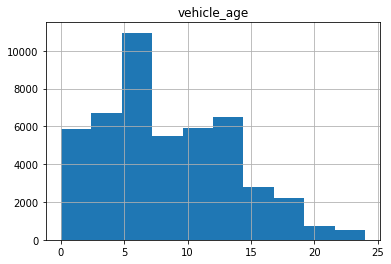

In [55]:
df_filtered.hist('vehicle_age',bins=10);

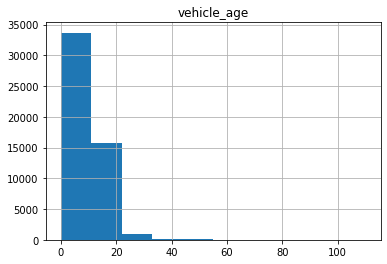

In [56]:
df.hist('vehicle_age',bins=10);

#### filtered age conclusion
after plotting the filtered and unfiltered age histograms, we can see that old aged cars(15+) are not common, while newer cars are being more common.

mileage filtered histogram and mileage unfiltered histogram for comparison

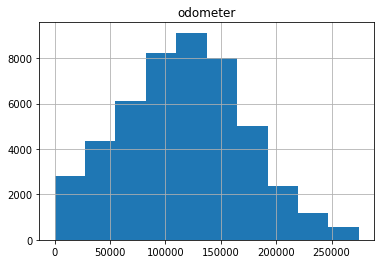

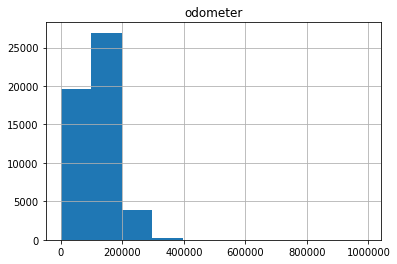

In [57]:
df_filtered.hist('odometer',bins=10);
df.hist('odometer',bins=10);

#### filtered mileage conclusion
after plotting the filtered and unfiltered mileage histograms, 
we conclude that the amount of low mileage cars and very high mileage cars are both fairly low.

### ad(days_listed) analysis

In [58]:
df_filtered.describe()

price    model_year     condition     cylinders       odometer  \
count  47752.000000  47752.000000  47752.000000  47752.000000   47752.000000   
mean   11367.127031   2009.953300      2.626906      6.026030  116369.098676   
std     7719.180370      5.114271      0.702255      1.631214   55571.899482   
min        3.000000   1994.000000      0.000000      3.000000       0.000000   
25%     5200.000000   2007.000000      2.000000      4.000000   76552.000000   
50%     8999.000000   2011.000000      3.000000      6.000000  117285.500000   
75%    15995.000000   2014.000000      3.000000      8.000000  153310.500000   
max    34275.000000   2019.000000      5.000000     12.000000  274700.000000   

        days_listed       ad_year   vehicle_age    avg_mileage  
count  47752.000000  47752.000000  47752.000000   47752.000000  
mean      39.558678   2018.306710      8.353409   18087.800281  
std       28.220946      0.461133      5.127059   12644.774968  
min        0.000000   2018.000000      0.000000       0.000000  
25%       19.000000   2018.000000      4.000000   11001.000000  
50%       33.000000   2018.000000      8.000000   15125.500000  
75%       53.000000   2019.000000     12.000000   21262.000000  
max      271.000000   2019.000000     24.000000  195700.000000

amount of different days advertisements

In [59]:
days_ads = df_filtered['days_listed'].value_counts().count()

ads histogram

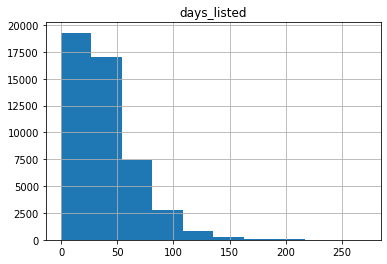

In [60]:
df_filtered.hist('days_listed',bins=10);

more bins histogram

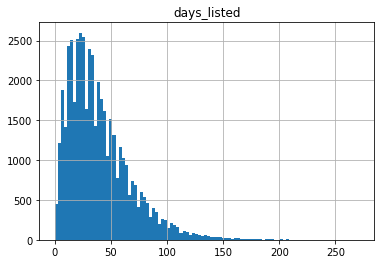

In [61]:
df_filtered.hist('days_listed',bins=100);

mean, median and mode of ad days listed

In [62]:
ad_mean = df_filtered['days_listed'].mean()
ad_mean
ad_median = df_filtered['days_listed'].sort_values().median()
ad_median

ad_mode = float(df_filtered['days_listed'].mode())
ad_mode

18.0

#### typical lifetime of an ad conclusion
After plotting and calculating the mean(39.5), the median(33), and the mode(18) of an ad's lifetime, we can tell the typical ad will last for 18 days, as the mode is the most common value and is referred to the typical value. 

#### determining quick removal and slow removal of an ad


In [63]:
df_filtered['days_listed'].describe()

count    47752.000000
mean        39.558678
std         28.220946
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [64]:
#calculating fences
iqr_fence2(df_filtered,'days_listed')

[-32.0, 104.0]

#### Conclusion:
By looking at the distribution of the data, we can see that 25% of the ads last for 19 days or lower, which will be
the the threshold for quick removal (<=19).
For the upper threshold - slow removal of an ad, we will use the upper fence - 104 days, which is an abnormally long time for an ad to last considering our data. (>104)

In [65]:
df_filtered.groupby('model')['price'].mean()

model
acura tl              6510.179487
bmw x5               10254.216730
buick enclave        11246.732342
cadillac escalade    12696.207746
chevrolet camaro     13172.890282
                         ...     
toyota sienna         8778.316456
toyota tacoma        15284.853875
toyota tundra        14912.960000
volkswagen jetta      6493.596491
volkswagen passat     8489.017192
Name: price, Length: 99, dtype: float64

### number of ads and average price per type analysis

calculating ads per model and average price per model

In [66]:
model_ads = df_filtered.groupby('model')['days_listed'].count()
model_avg_price = df_filtered.groupby('model')['price'].mean()

configuring the plot and plotting the dependence of the number of ads on the vehicle type

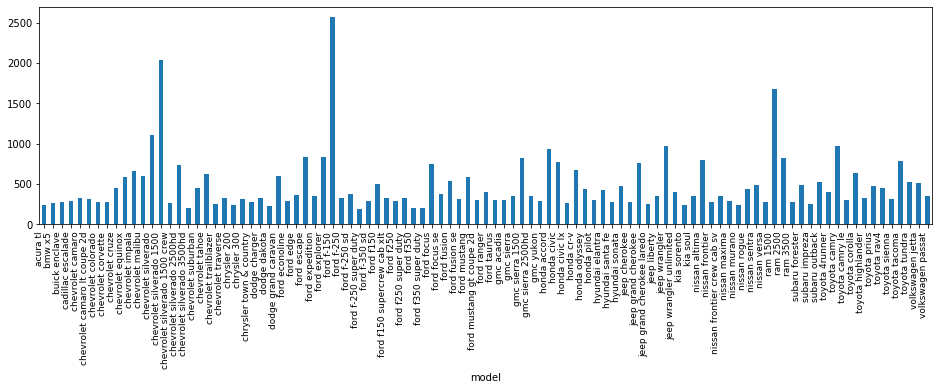

In [67]:
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=9
)
model_ads.plot(kind='bar',figsize=(16,4));

#### Graph description

This graph shows most of the models dont surpass 500 ads, some reach 1000, and out of 100 models only 4 surpassed 1000 ads.

<div class="alert alert-вфтпук" role="alert">
Reviewer's comment v. 1:
    
Please fix an overlapping of the labels. Please note that as Data Analyst you should describe graphs in details and make a corresponding conclusion.
    
Please see the following link how graphs can be described: http://explainwell.org/index.php/table-of-contents-handle-numbers/phrases-and-6-analysis-steps-to-interpret-a-graph/ 
</div>

selecting two types with greatest number of ads

In [68]:
top2_ads = df_filtered.groupby('model')['days_listed'].count().sort_values(ascending=False).head(2)
top2_ads

model
ford f-150                  2570
chevrolet silverado 1500    2040
Name: days_listed, dtype: int64

In [69]:
#storing the model names in another variable
top2_ads_types = ['ford f-150', 'chevrolet silverado 1500']
top2_ads_types

['ford f-150', 'chevrolet silverado 1500']

#### Conclusion
The top 2 model types are ford f-150 with 2570 ads, and chevrolet silverado 1500 with 2040 ads.

### Price factors analysis

checking age,mileage and condition's impact on the price for the top 2 models from the previous stage and plotting price by age distribution

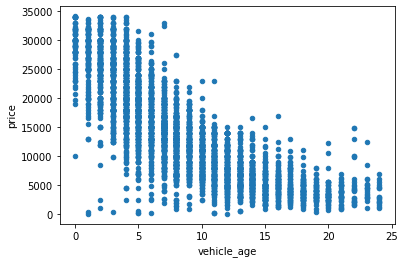

In [70]:
top2 = df_filtered.query('model == "ford f-150" or model == "chevrolet silverado 1500"')
top2.plot(kind='scatter', x='vehicle_age', y='price');

#### Description:
This graph shows the age has an impact on the price.
generally ,the lower the age - the higher the price ,and the higher the age - the lower the price.

plotting price by mileage distribution

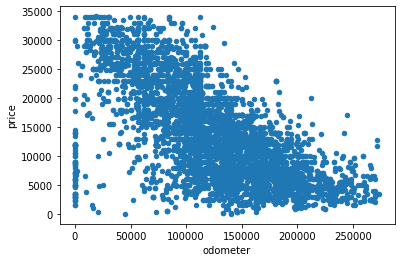

In [71]:
top2.plot(kind='scatter', x='odometer', y='price');

#### Description:
This graph shows the trend in the plot: more mileage leads to lower price, while lower mileage usually leads to higher price.

plotting price by condition

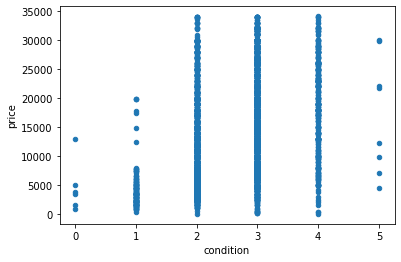

In [72]:
top2.plot(kind='scatter', x='condition', y='price');

#### Description:
This graph shows that there are no bad conditioned cars (0,1) that reaches high prices,
and that shows the impact of the condition on the price.

analaysing price by transmission type

veryfing the categories has more than 50 ads and is valid for analysis


In [73]:
top2.groupby('transmission')['days_listed'].count()

transmission
automatic    4520
manual         77
other          13
Name: days_listed, dtype: int64

the 'other' category doesnt reach 50 ads and is not valid for analysis

slicing only the valid categories and box plotting price by transmission type

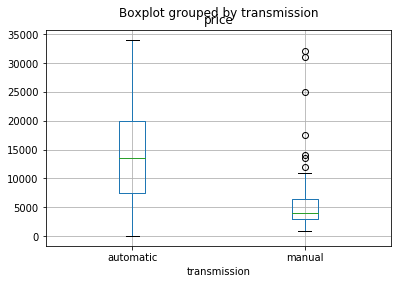

In [74]:
trans_valid = top2.query('transmission == "automatic" or transmission == "manual"')
trans_valid.boxplot(by ='transmission', column =['price'], grid = True);

#### Description:
The box plots show that the manual transmission cars have alot of upper outliers,
some of those cars have a high price - the assumption is those are rare cars that has a lot of value.
On the other hand, the autommatic type has no outliers and it's price is fairly balanced.

analaysing price by color

veryfing the categories has more than 50 ads and is valid for analysis

In [75]:
top2.groupby('paint_color')['days_listed'].count().sort_values()

paint_color
orange           3
purple           4
yellow           9
brown           98
custom         106
green          109
blue           363
grey           373
silver         390
red            512
black          645
not_listed     808
white         1190
Name: days_listed, dtype: int64

#### Conclusion:
orange, purple and yellow have less than 50 ads and are not valid for analysis.
slicing away the invalid colors and box plotting the valid ones.

In [77]:
color_valid.head()

price  model_year                     model  condition  cylinders fuel  \
1   25500        2014                ford f-150          2          6  gas   
3    1500        2003                ford f-150          1          8  gas   
10  19500        2011  chevrolet silverado 1500          3          8  gas   
39   8000        2009                ford f-150          2          8  gas   
50   6200        2006                ford f-150          3          6  gas   

    odometer transmission    type paint_color  is_4wd date_posted  \
1      88705    automatic  pickup       white    True  2018-10-19   
3     163331    automatic  pickup  not_listed   False  2019-03-22   
10    128413    automatic  pickup       black    True  2018-09-17   
39    234000    automatic   truck       black    True  2019-03-31   
50     69698    automatic   truck      custom   False  2018-05-03   

    days_listed price_category model_years_cat ad_week_day   ad_month  \
1            50           high        semi new      Friday    October   
3             9            low             old      Friday      March   
10           38           high        semi old      Monday  September   
39            1  below_average        semi old      Sunday      March   
50           50  below_average             old    Thursday        May   

    ad_year  vehicle_age  avg_mileage  
1      2018            4        22176  
3      2019           16        10208  
10     2018            7        18344  
39     2019           10        23400  
50     2018           12         5808

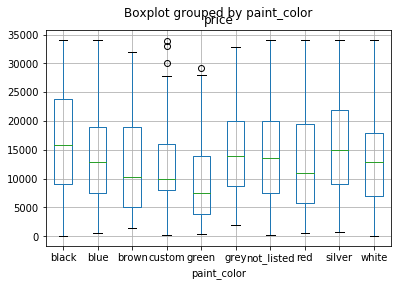

In [76]:
color_valid = top2[~top2['paint_color'].isin(['orange', 'purple','yellow'])]
color_valid.boxplot(by ='paint_color', column =['price'], grid = True);

#### Description:
The box plots show that most colors have their prices pretty similiar to each other,
but we can also see that custom color has upper outliers which means cars with custom colors cost more, which makes sense.
the green color also has an upper outlier and rarely surpasses the upper fence.

## Overall conclusion


To summarize, we concluded many conclusions regarding different aspects of the data:
- In the data's preparation & processing stage:
1. we discovered 5 columns with missing values that had to be dealt with in order to continue the process.
2. 5 columns's datatypes have been changed.
3. rows with price value of 1 got removed (1.5% of the data).
4. 5 new columns were added in order to have more insights.


- In the exploratory data analysis stage:
1. We discovered and removed outliers for the price, car's age, and mileage for further analysis.
2. Strong correlations between the price, car's age and mileage - to the amount of cars have been found.
  - the higher the price, the lower amount of cars.
  - the higher the age - the lower amount of cars.
  - low amount of cars have a very low mileage or a  very high mileage.
3. the typical ad lasts for 18 days.
  - quick removal of an ad means lasting for 19 days or less.
  - slow removal of an ad means lasting for more than 104 days.
4. most of the models dont have more than 500 ads.
5. the top 2 models by ads number are ford f-150 with 2570 ads, and chevrolet silverado 1500 with 2040 ads.
6. the lower the age of the car - the higher the price.
7. more mileage leads to lower price.
8. there are many manual tranmission type cars that exceeds the expected price and are priced very highely.
9. custom colored cars are also being sold at very high prices occasionally.